# Imports

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn import neural_network
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error, confusion_matrix

from sklearn.naive_bayes import MultinomialNB, GaussianNB 


from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, LeavePOut, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import RFECV


from sklearn.linear_model import LogisticRegression, Ridge


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from IPython.display import Image

In [ ]:
is_to_image = True

In [ ]:
!git clone https://gist.github.com/31ca6b32c74efe784a91a5a6944fafaa.git

Cloning into '31ca6b32c74efe784a91a5a6944fafaa'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


# EDA

Create a dataframe from the input csv and move the survived column to the last column.

In [ ]:
titanic_df = pd.read_csv('/content/31ca6b32c74efe784a91a5a6944fafaa/titanic_train')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Take a first look on our data and check missing values percent of each feature and number of unique values of each feature

In [ ]:
print(titanic_df.info())
total_missing = pd.DataFrame(titanic_df.isnull().sum() / titanic_df.shape[0] * 100, columns=["%"])
display(total_missing)
display(titanic_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,%
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

We can see that we have a lot of missing values in Age and Cabin columns. We will handle with missing values later.
We can see that we have a few categorical features - Name,Sex,Embarked,Ticket.
We will handle with this later as well.
We can also see that there are few columns with a lot of unique values.
PassengerId, Name, Ticket.
Fare and Cabin also have big amount of unique values.

Lets see few more information about the data

In [ ]:
def create_pie_chart_of_count(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    fig = px.pie(df_not_null.groupby([column_name]).size().reset_index(name='count'), names=column_name, values='count')
    fig.show()

create_pie_chart_of_count(titanic_df, 'Sex')
create_pie_chart_of_count(titanic_df, 'Embarked')
create_pie_chart_of_count(titanic_df, 'Survived')

Lets check the distribution of "Age" and create a scatter plot between to describe the connection between "Age" and "Pclass" with "Survived" column

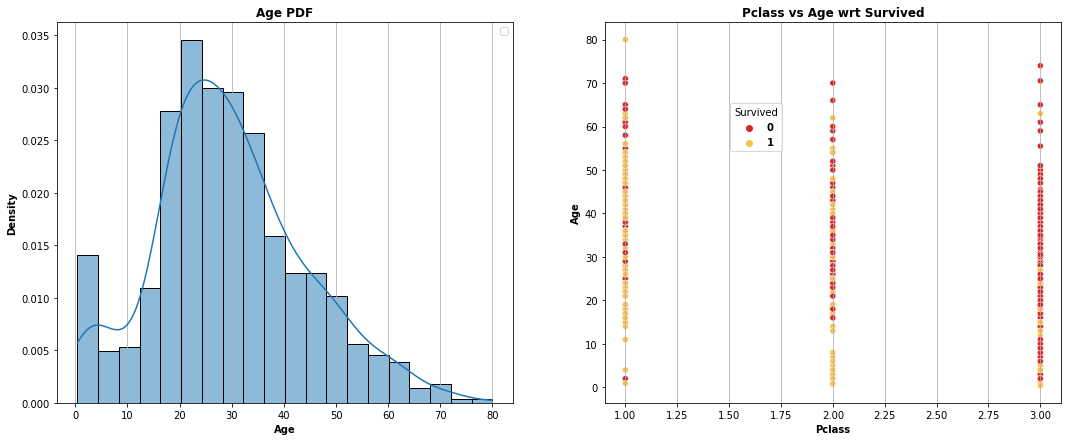

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

mean = titanic_df["Age"].mean()
mode = titanic_df["Age"].mode()
median = titanic_df["Age"].median()

sns.histplot(titanic_df["Age"], stat="density", kde=True, ax=axs[0])
axs[0].set_title("Age PDF", fontweight="bold")
axs[0].set_xlabel("Age", fontweight="bold")
axs[0].set_ylabel("Density", fontweight="bold")
l = axs[0].legend()
for text in l.get_texts():
    text.set_fontweight("bold")
    text.set_color("black")
axs[0].grid(axis="x")

sns.scatterplot(x=titanic_df["Pclass"], y=titanic_df["Age"], hue=titanic_df["Survived"], ax=axs[1],palette=["#d62828", "#fcbf49"])
axs[1].set_title("Pclass vs Age wrt Survived", fontweight="bold")
axs[1].set_xlabel("Pclass", fontweight="bold")
axs[1].set_ylabel("Age", fontweight="bold")
axs[1].grid(axis="x")
l = axs[1].legend(loc='upper right', bbox_to_anchor=(0.4, 0.8), title="Survived")
for text in l.get_texts():
    text.set_fontweight("bold")
    text.set_color("black")
plt.show()

From the left graph, we can see that most of the passengers are between 20-35. We also see that they are many children under 5 years old.
From the right graph, we can see that almost all the people from Pclss 3 didn't survive while most of the people from Pclass 1 and under the age of 55 survived.

Check correlation between features

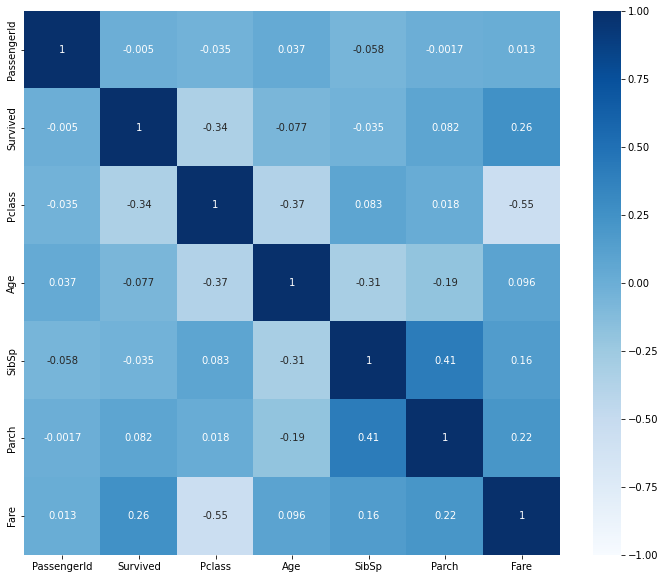

In [ ]:
plt.figure(figsize=(12,10))
cor = titanic_df.corr()
sns.heatmap(cor, annot=True,
            cmap=plt.cm.Blues, vmin=-1, vmax=1)
plt.show()

# Handle with missing values

I will drop unnecessary columns:

Cabin - has a lot of missing values

PassengerId, Ticket - a lot of unique values. I will drop the Name column later

In [ ]:
titanic_df = titanic_df.drop(columns = ['PassengerId', 'Ticket', 'Cabin'])

We saw that we have a lot of missing values in Age column, I will fill the missing values with the mean age value

In [ ]:
titanic_df['Age'].fillna(int(titanic_df['Age'].mean()), inplace=True)

Lets see what are the values of Embarked column

In [ ]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Lets fill the 2 rows that have missing values in the embarked column with 'S' because it is the most common value by far

In [ ]:
titanic_df['Embarked'].fillna('S', inplace=True)

# Create new features

We saw that there is kind of strong correlation between Parch and Sbsp. Both of this feature relate to passengers' family.
I will try to combine those features to one feature.





In [ ]:
titanic_df['family'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df = titanic_df.drop(columns = ['SibSp', 'Parch'])

add new feature - alone

determine if a traveler is traveling alone

In [ ]:
titanic_df['alone'] = np.where(titanic_df['family'] == 0, 1, 0)

add another new feature - Title

Extract the title from the name

In [ ]:
def extract_title(name):
  return name.split(',')[1].split('.')[0].strip()

In [ ]:
titanic_df['Title'] = titanic_df['Name'].apply(extract_title)
titanic_df = titanic_df.drop(columns = ['Name'])

Lets see the values of the new feature

In [ ]:
titanic_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

There are few very rare values, I will replace them with 'Rare' to prevent overfitting and replace values that similar to other values and encode the title column with a custom encoding

In [ ]:
def arrange_title_column(df):
  df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  df['Title'] = df['Title'].replace('Mlle', 'Miss')
  df['Title'] = df['Title'].replace('Ms', 'Miss')
  df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [ ]:
arrange_title_column(titanic_df)
titanic_df

,Survived,Pclass,Sex,Age,Fare,Embarked,family,alone,Title
0,0,3,male,22.0,7.2500,S,1,0,Mr
1,1,1,female,38.0,71.2833,C,1,0,Mrs
2,1,3,female,26.0,7.9250,S,0,1,Miss
3,1,1,female,35.0,53.1000,S,1,0,Mrs
4,0,3,male,35.0,8.0500,S,0,1,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0,1,Rare
887,1,1,female,19.0,30.0000,S,0,1,Miss
888,0,3,female,29.0,23.4500,S,3,0,Miss
889,1,1,male,26.0,30.0000,C,0,1,Mr


# Data Pre-processing


I will try to scaling the Fare column and use OneHot on Embarked and Sex columns. 

In [ ]:
col_transformer = ColumnTransformer(
    transformers=[
        ("trf1", OneHotEncoder(sparse=False,), ["Sex", "Embarked", "Title"]),
        ("trf2", MinMaxScaler(), ["Fare"])
    ]
)

In [ ]:
df = col_transformer.fit_transform(titanic_df[['Sex', 'Embarked', 'Title', 'Fare']])
df = pd.DataFrame(df)
titanic_df = titanic_df.drop(columns=['Sex', 'Embarked', 'Title', 'Fare']).join(df)



Finally, lets take a final look on our data and check if there any missing values.

In [ ]:
display(titanic_df)
print(titanic_df.info())
titanic_df.isna().sum()

,Survived,Pclass,Age,family,alone,0,1,2,3,4,5,6,7,8,9,10
0,0,3,22.0,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.014151
1,1,1,38.0,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.139136
2,1,3,26.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.015469
3,1,1,35.0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.103644
4,0,3,35.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.025374
887,1,1,19.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.058556
888,0,3,29.0,3,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.045771
889,1,1,26.0,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.058556


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   family    891 non-null    int64  
 4   alone     891 non-null    int64  
 5   0         891 non-null    float64
 6   1         891 non-null    float64
 7   2         891 non-null    float64
 8   3         891 non-null    float64
 9   4         891 non-null    float64
 10  5         891 non-null    float64
 11  6         891 non-null    float64
 12  7         891 non-null    float64
 13  8         891 non-null    float64
 14  9         891 non-null    float64
 15  10        891 non-null    float64
dtypes: float64(12), int64(4)
memory usage: 111.5 KB
None


Survived    0
Pclass      0
Age         0
family      0
alone       0
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
dtype: int64

We don't have missing values! We are ready to train our model.

I will check what is the best way to split the data between train and validation data

In [ ]:
X = titanic_df.drop(columns=['Survived'])
t = titanic_df["Survived"]

In [ ]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75]) #Get 1st and 3rd quartiles (25% -> 75% of data will be kept)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5) #Get lower bound
    upper_bound = quartile_3 + (iqr * 1.5) #Get upper bound
    return np.where((ys > upper_bound) | (ys < lower_bound)) #Get outlier values

#Third, we will drop the outlier values from the train set

trainWithoutOutliers = X #We can't change train while running through it
tWithoutOutliers = t

for column in X:
    outlierValuesList = np.ndarray.tolist(outliers_iqr(X[column])[0]) #outliers_iqr() returns an array
    trainWithoutOutliers = X.drop(outlierValuesList) #Drop outlier rows
    tWithoutOutliers = t.drop(outlierValuesList)
    
X = trainWithoutOutliers.reset_index(drop=True)
t = tWithoutOutliers.reset_index(drop=True)

In [ ]:
def print_graphs_r2_mse(graph_points):
    for k, v in graph_points.items():
        best_value = max(v.values()) if 'R2' in k else min(v.values())
        best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        fig = px.scatter(x=v.keys(), y=v.values(), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color])
        fig.data[0].update(mode='markers+lines')
        fig.show()

In [ ]:
def plot_score_and_loss_by_split(X, t):
    graph_points = {
                    'train_MSE':{},
                    'val_MSE': {},
                    'train_R2' : {},
                    'val_R2' : {}
                    }
    for size in range(10, 100, 10):
        X_train, X_val, t_train, t_val = model_selection.train_test_split(
            X, t.values, test_size=size/100, random_state=42)
        l_reg = linear_model.LogisticRegression().fit(X_train, t_train)
        y_train = l_reg.predict(X_train)
        y_val = l_reg.predict(X_val)
        graph_points['train_MSE'][size/100] = metrics.mean_squared_error(t_train, y_train)
        graph_points['val_MSE'][size/100] = metrics.mean_squared_error(t_val, y_val)
        graph_points['train_R2'][size/100] = l_reg.score(X_train, t_train)
        graph_points['val_R2'][size/100] = l_reg.score(X_val, t_val)
    print_graphs_r2_mse(graph_points)

plot_score_and_loss_by_split(X, t)

We can see that when the validation data size is small, its loss is small.
One explanation to this is that for a small group of samples, it is easier to match a linear hypothesis.
We can see that from around 0.3, the validation loss is equal to test loss.
So, let's give the validation group 30% of the dataset.

In [ ]:
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.3, random_state=42)

Train the Model on the dataset with three differnet models

In [ ]:
SGD_cls = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
     linear_model.SGDClassifier(loss='log', alpha=0,
                                learning_rate='constant',
                                eta0=0.01)
     ).fit(X_train, t_train)


l_reg = pipeline.make_pipeline(
        preprocessing.StandardScaler(),
        linear_model.LogisticRegression(random_state=0)).fit(X_train, t_train)


MLP_cls = neural_network.MLPClassifier(
    activation='logistic',
     solver='sgd', alpha=0, max_iter=10000
     ).fit(X_train, t_train)

Check our prediction accuracy

In [ ]:
y_train_prob_SGD = SGD_cls.predict_proba(X_train)
y_val_prob_SGD = SGD_cls.predict_proba(X_val)

y_train_SGD = SGD_cls.predict(X_train)
y_val_SGD = SGD_cls.predict(X_val)


y_train_reg = l_reg.predict(X_train)
y_val_reg = l_reg.predict(X_val)

y_train_prob_MLP = SGD_cls.predict_proba(X_train)
y_val_prob_MLP = SGD_cls.predict_proba(X_val)

y_train_MLP = MLP_cls.predict(X_train)
y_val_MLP = MLP_cls.predict(X_val)

Check our predictions

In [ ]:
def check_acc(X_train, X_val, model):

    
    y_train = model.predict(X_train)
    y_val = model.predict(X_val)
    
    print('Accuracy score on train',
              model.score(X_train, t_train))
    print('Accuracy score on validation',
                model.score(X_val, t_val))
    print()
    
    #if model != l_reg:
    #y_train_prob = (model.predict_proba(X_train)[:,1] >= 0.3).astype(int)
    #y_val_prob = (model.predict_proba(X_val)[:,1] >= 0.3).astype(int)
    y_train_prob = model.predict_proba(X_train)
    y_val_prob = model.predict_proba(X_val)

    print('CE on train',
              metrics.log_loss(t_train, y_train_prob))
    print('CE on validaton', 
              metrics.log_loss(t_val, y_val_prob))
    '''else:
        print('MSE on train',
          metrics.mean_squared_error(t_train, y_train))
        print('MSE on test',
          metrics.mean_squared_error(t_val, y_val))'''
    print()
print('SGD')        
check_acc(X_train, X_val, SGD_cls)
print('l_reg')
check_acc(X_train, X_val, l_reg)
print('MLP')
check_acc(X_train, X_val, MLP_cls)

SGD
Accuracy score on train 0.8339483394833949
Accuracy score on validation 0.7896995708154506

CE on train 0.39854683863541657
CE on validaton 0.48758542490800044

l_reg
Accuracy score on train 0.8284132841328413
Accuracy score on validation 0.7896995708154506

CE on train 0.39772610514451595
CE on validaton 0.4862098305094126

MLP
Accuracy score on train 0.8173431734317343
Accuracy score on validation 0.7811158798283262

CE on train 0.4404423307316126
CE on validaton 0.4895905880849548



We can see that all the models have similar results
Lets try to look more on our models

Lets check what will happend if we will change some hyperparameters

In [ ]:
eta = [0.1, 0.01, 0.001, 0.0001]
test_scores = np.empty(0)
valid_scores = np.empty(0)
for lr in eta:
    SGD_cls = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
     linear_model.SGDClassifier(loss='log', alpha=0,
                                learning_rate='constant',
                                eta0=lr)
     ).fit(X_train, t_train)
    test_scores = np.append(test_scores, SGD_cls.score(X_train, t_train))
    valid_scores = np.append(valid_scores, SGD_cls.score(X_val, t_val))
    
fig = px.scatter(x=eta, y=[test_scores, valid_scores], title="test and validation scores - SGD")
fig.data[0].update(mode='markers+lines')
fig.data[1].update(mode='markers+lines')
newnames = {'wide_variable_0':'test_score', 'wide_variable_1': 'validation_scroe'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))           
fig.show()


states = [0, 1, 2]
test_scores = np.empty(0)
valid_scores = np.empty(0)
for rs in states:
    l_reg = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
     linear_model.LogisticRegression(random_state = rs)
     ).fit(X_train, t_train)
    test_scores = np.append(test_scores, l_reg.score(X_train, t_train))
    valid_scores = np.append(valid_scores, l_reg.score(X_val, t_val))
    
fig = px.scatter(x=states, y=[test_scores, valid_scores], title="test and validation scores - l_reg")
fig.data[0].update(mode='markers+lines')
fig.data[1].update(mode='markers+lines')
newnames = {'wide_variable_0':'test_score', 'wide_variable_1': 'validation_scroe'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
                  
fig.show()


activations = ['identity', 'logistic', 'tanh', 'relu']
test_scores = np.empty(0)
valid_scores = np.empty(0)
for active in activations:
    MLP_cls = neural_network.MLPClassifier(
    activation=active,
     solver='sgd', alpha=0, max_iter=10000
     ).fit(X_train, t_train)
    test_scores = np.append(test_scores, MLP_cls.score(X_train, t_train))
    valid_scores = np.append(valid_scores, MLP_cls.score(X_val, t_val))
    
fig = px.scatter(x=activations, y=[test_scores, valid_scores], title="test and validation scores - MLP")
fig.data[0].update(mode='markers+lines')
fig.data[1].update(mode='markers+lines')
newnames = {'wide_variable_0':'test_score', 'wide_variable_1': 'validation_scroe'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))


fig.show()

We can see that 0.01 learning rate is better both for the test and the validation scores on the SGD model.
The random state on the l_reg model didn't change nothing.
Also, we can see that the  activation function is didn't have a big affect a lot 
So, I will try the SGD with lr = 0.01, MLP with logistic activation (both models have trained already with those hyperparameter)

# Submit predictions on test data

Now, we ready to make predictions on the test data. Lets load the data and look up on it


In [ ]:
test_df = pd.read_csv('/content/31ca6b32c74efe784a91a5a6944fafaa/titanic_test')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We see that in the test data the Cabin column has a lot of missing values as well. The age column has a big amount of missing values too. And the Fare column has 1 missing value, I will fill that value with the mean value.
The function below prepares the test data for predictions

In [ ]:
def prepare_for_predict(df):
    df['family'] = df['SibSp'] + df['Parch']
    df['alone'] = np.where(df['family'] == 0, 1, 0)
    df['Title'] = df['Name'].apply(extract_title)
    arrange_title_column(df)
    df = df.drop(columns = ['SibSp', 'Parch', 'Name', 'Ticket', 'Cabin'])
    df['Fare'].fillna(int(df['Fare'].mean()), inplace=True)
    df['Age'].fillna(int(df['Age'].mean()), inplace=True)
    col_transformer = ColumnTransformer(
    transformers=[
        ("trf1", OneHotEncoder(sparse=False,), ["Sex", "Embarked", "Title"]),
        ("trf2", MinMaxScaler(), ["Fare"])
    ])

## transform the dataset ##
    temp_df = col_transformer.fit_transform(df[['Sex', 'Embarked', 'Title', 'Fare']])
    temp_df = pd.DataFrame(temp_df)
    #temp_df.rename(columns = {0:'is_male', 1:'is_female', 2:'C', 3 :'Q', 4 :'S', 5: 'Sacle_Fare'}, inplace = True)
    df = df.drop(columns=['Sex', 'Embarked', 'Fare', 'Title']).join(temp_df)
    return df
    #display(df)

In [ ]:
test_df = prepare_for_predict(test_df)
test_df

,PassengerId,Pclass,Age,family,alone,0,1,2,3,4,5,6,7,8,9,10
0,892,3,34.5,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.015282
1,893,3,47.0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.013663
2,894,2,62.0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.018909
3,895,3,27.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.016908
4,896,3,22.0,2,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.023984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.015713
414,1306,1,39.0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.212559
415,1307,3,38.5,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.014151
416,1308,3,30.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.015713


In [ ]:
X_test = test_df.copy()
X_test = X_test.drop(columns = ['PassengerId'])
#y = MLP_cls.predict(X)
y = l_reg.predict(X_test)
#y = SGD_cls(X)
df = pd.DataFrame(y, columns=['Survived'])
df = pd.DataFrame(test_df['PassengerId']).join(df)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
#my_submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y})
my_submission = df
my_submission.to_csv('submission.csv', index=False)

# KNN Model

Lets find waht is the best numbers of neighbors

In [ ]:
hyper_parameters = {'n_neighbors': list(range(1, 10)), 'leaf_size': list(range(1, 10))}
knn = GridSearchCV(KNeighborsClassifier(), hyper_parameters).fit(X_train, t_train)
print('Accuracy score for classification:')
print('knn model', knn.best_score_)
print('best params', knn.best_params_)
check_acc(X_train, X_val, knn)

Accuracy score for classification:
knn model 0.8080869860686374
best params {'leaf_size': 1, 'n_neighbors': 3}
Accuracy score on train 0.8782287822878229
Accuracy score on validation 0.7811158798283262

CE on train 0.41313193172039125
CE on validaton 3.4971002069595527



Now, we have a knn model with the best neighbors size

# NBC Model

Now, lets build a nbc model

In [ ]:
hyper_parameters = {'alpha': list(np.arange (0, 2, 0.1))}
nb = GridSearchCV(MultinomialNB(), hyper_parameters).fit(X_train, t_train)
print('Accuracy score for classification:')
print('nb model', nb.best_score_)
print('best params', nb.best_params_)
#nb = MultinomialNB(alpha=1).fit(X_train, t_train)
check_acc(X_train, X_val, nb)

Accuracy score for classification:
nb model 0.7822799864084269
best params {'alpha': 0.0}
Accuracy score on train 0.7933579335793358
Accuracy score on validation 0.759656652360515

CE on train 0.6198353480248517
CE on validaton 0.6658056264775652



# Croos - Validation

Let's create a method that gets: data and model and returns R2 score and CE loss

In [ ]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None,
                          k=None, p=None,
                          show_score_loss_graphs=False):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')
    best_val_loss_index = 0
    best_val_loss = 1
    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train_proba = model.predict_proba(X_train)
        y_val_proba = model.predict_proba(X_val)
        if model.score(X_train, t_train) < 0 or model.score(X_val, t_val) < 0:
          pass
        else:
          scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train),
          metrics.log_loss(t_train, y_train_proba)]
          scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), metrics.log_loss(t_val, y_val_proba)]
          if metrics.log_loss(t_val, y_val_proba) < best_val_loss:
            best_val_loss = metrics.log_loss(t_val, y_val_proba)
            best_val_loss_index = i

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()


    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        if is_to_image:
          img_bytes = fig.to_image(format="png", width=800, height=400, scale=2)
          display(Image(img_bytes))
        else:
          fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        if is_to_image:
          img_bytes = fig.to_image(format="png", width=800, height=400, scale=2)
          display(Image(img_bytes))
        else:
          fig.show()
    return mean_val_score, mean_val_loss,\
     mean_train_score, mean_train_loss, best_val_loss_index

Graphs for knn


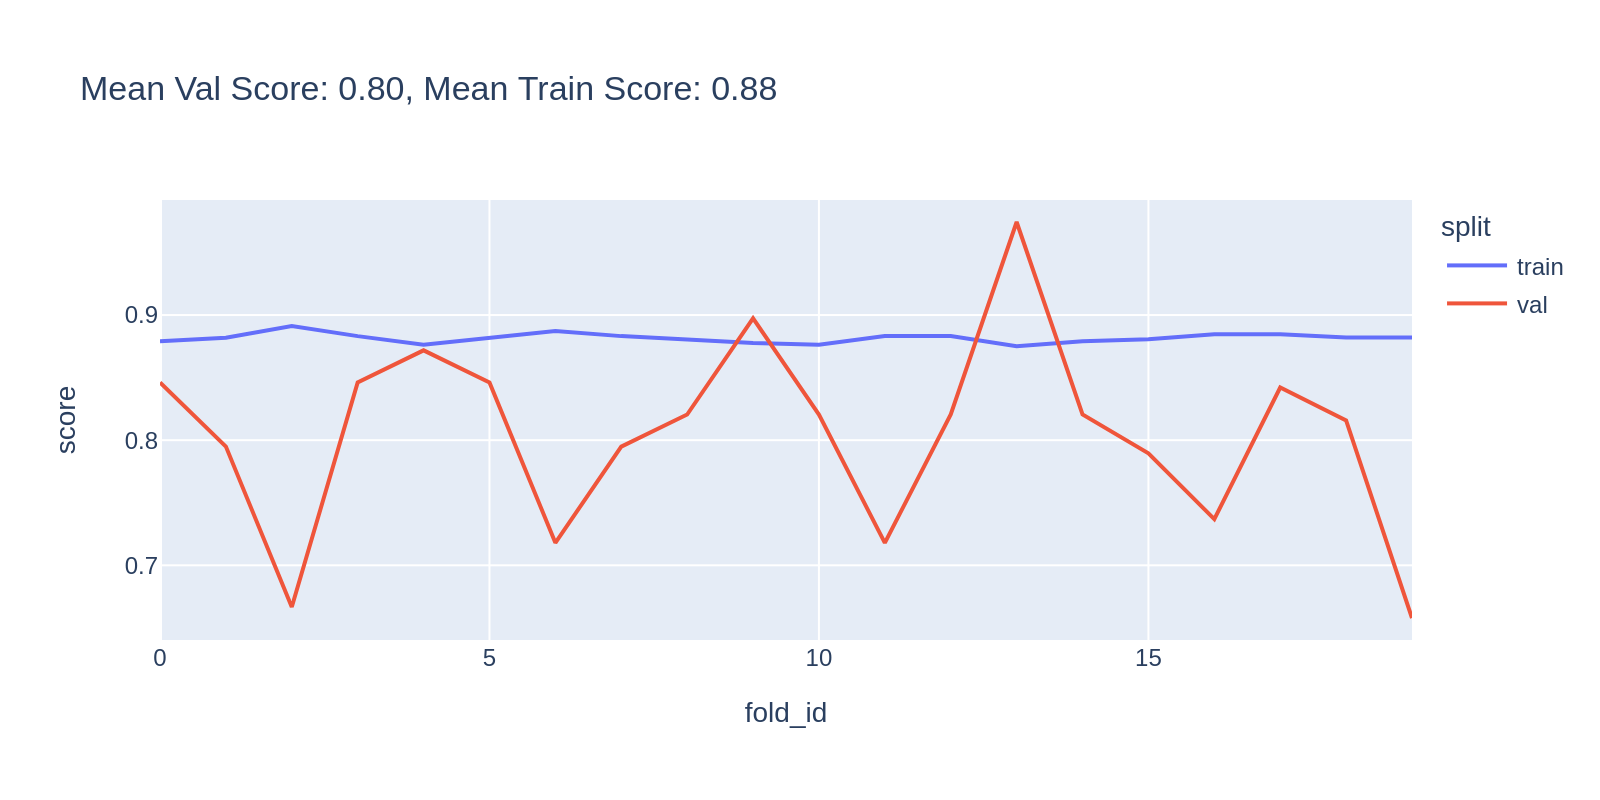

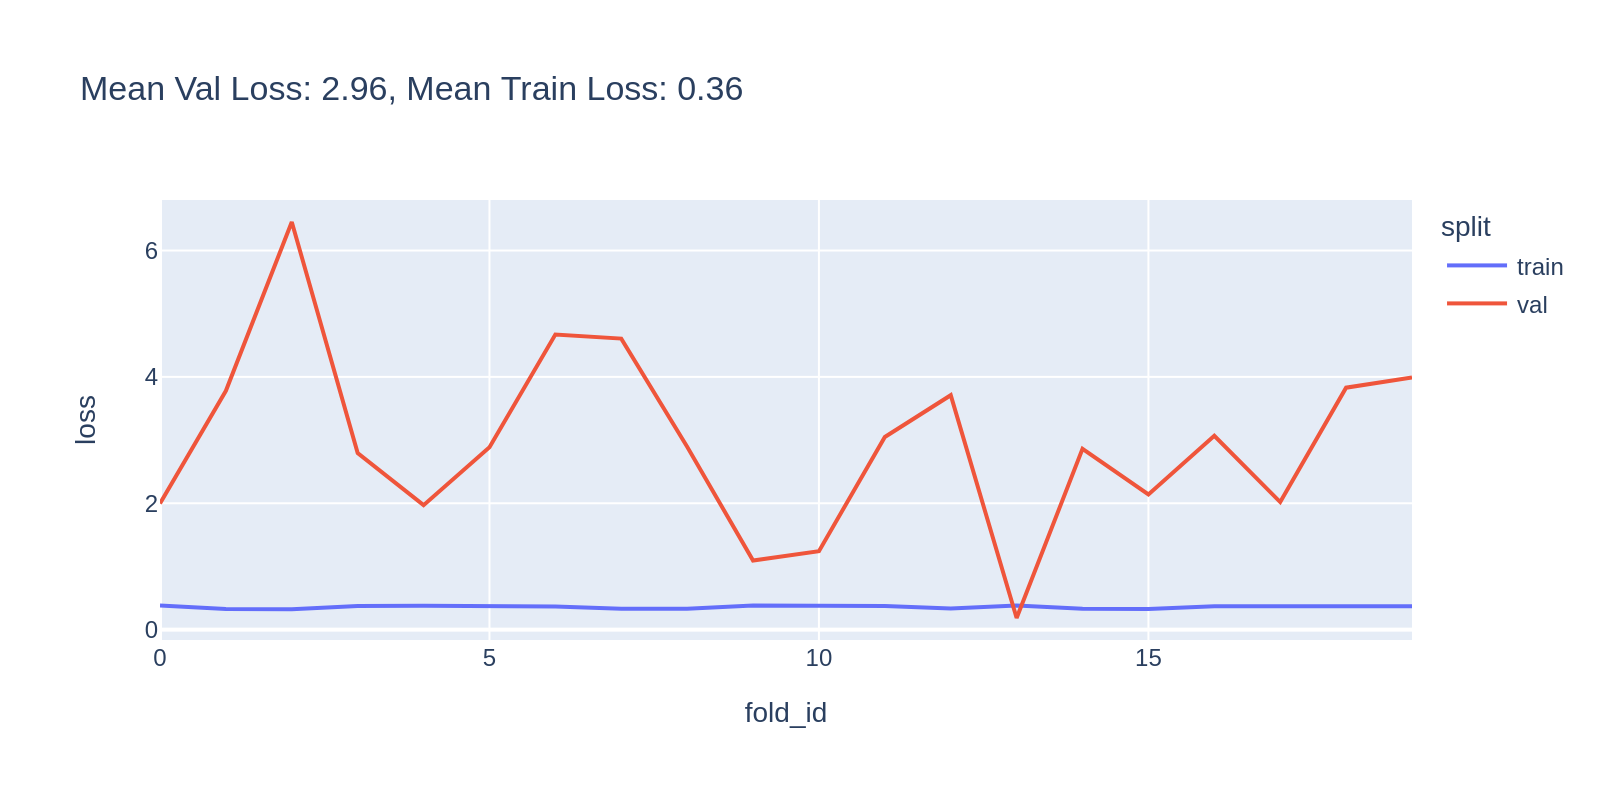

Result for knn
mean cv val score: 0.80
mean cv val loss 2.96
mean cv train score: 0.88
mean cv val loss 0.36
Best K split: 13
Graphs for naive bayes


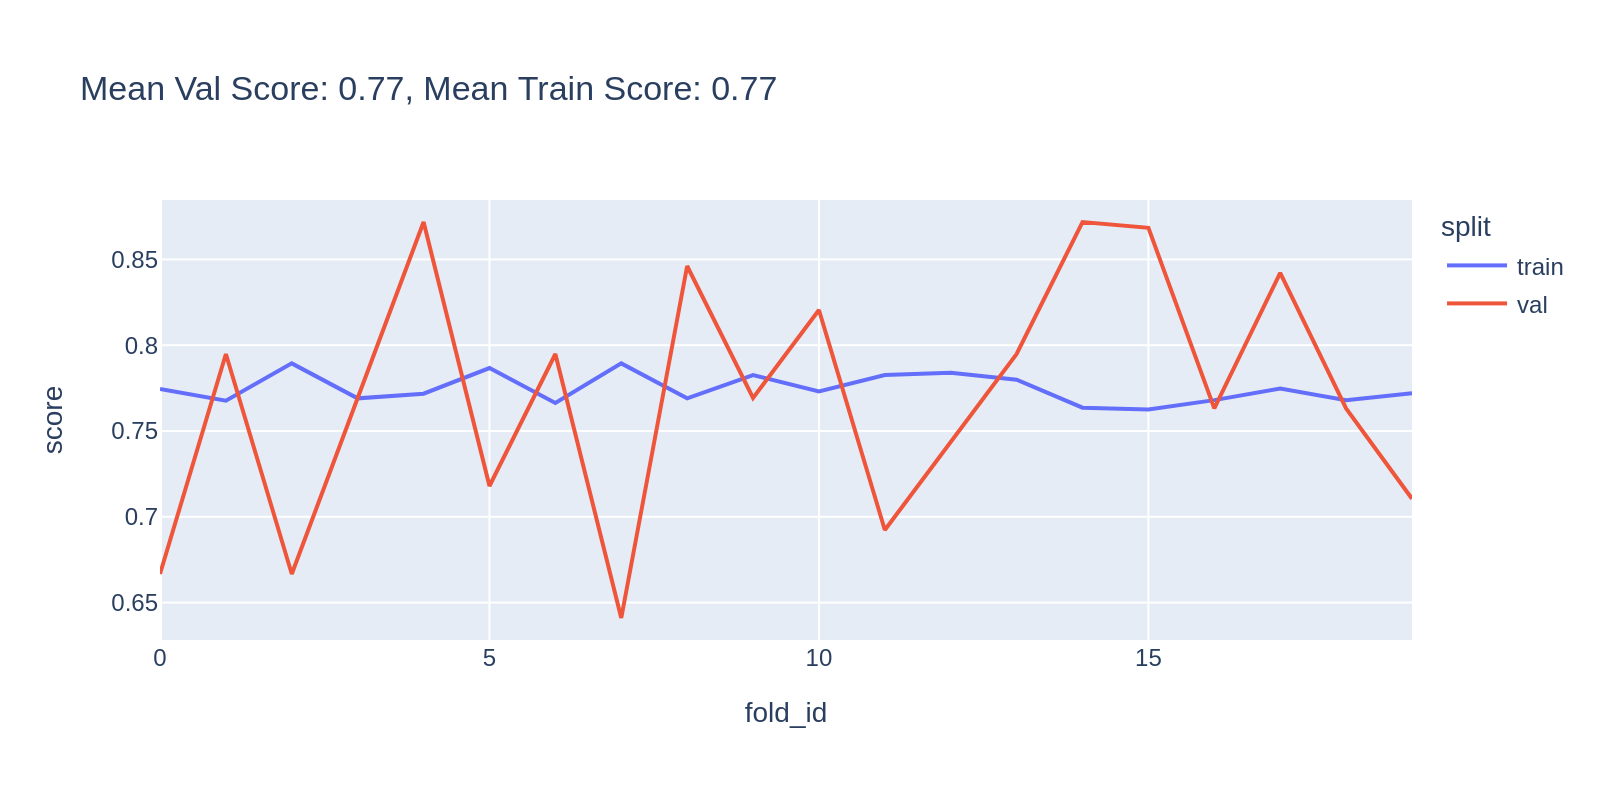

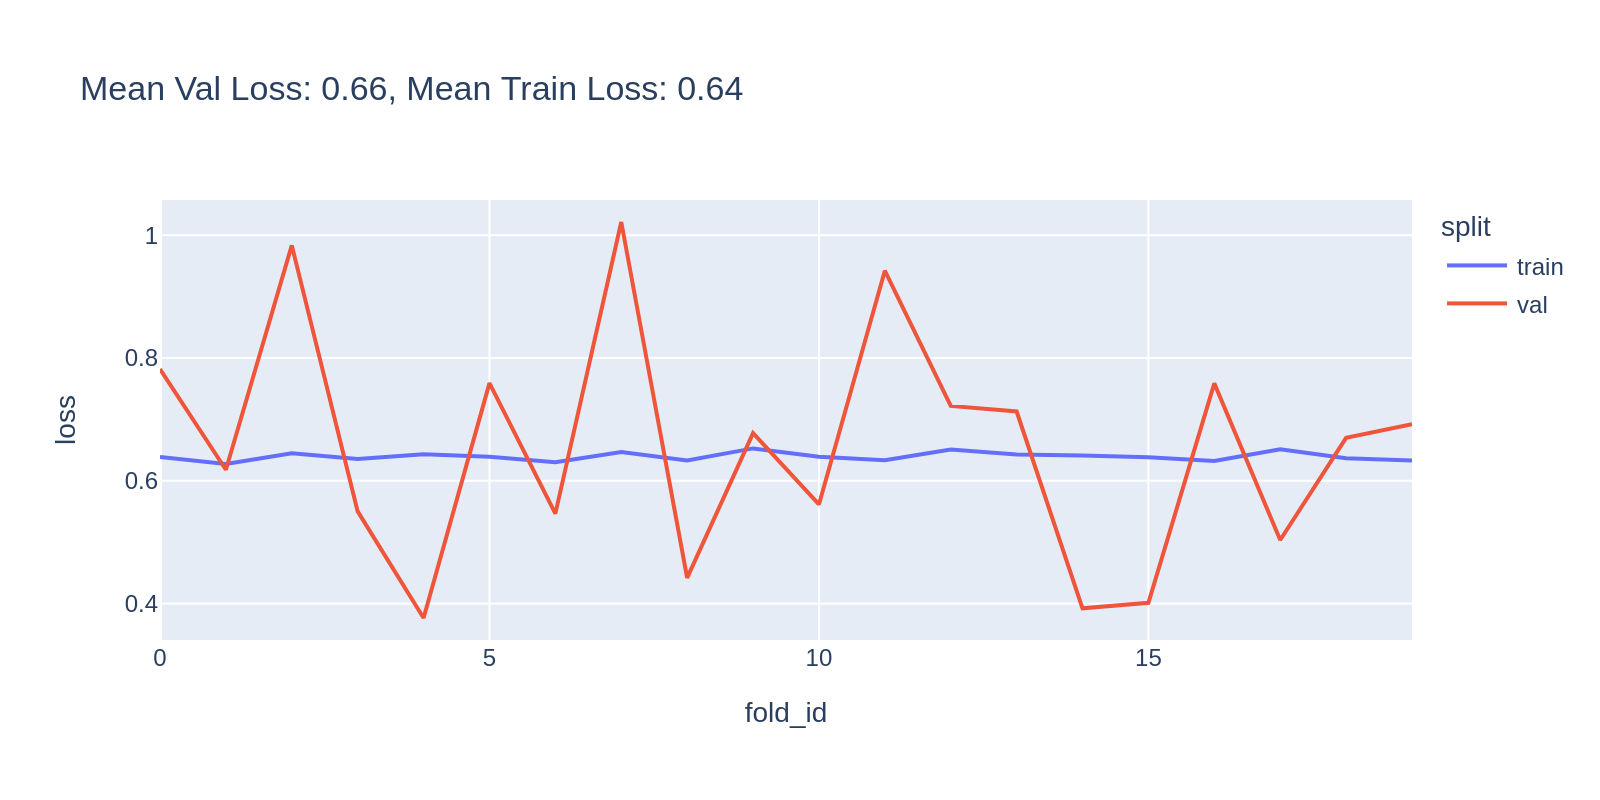

Result for naive bayes
mean cv val score: 0.77
mean cv val loss 0.66
mean cv train score: 0.77
mean cv val loss 0.64
Best K split: 4


In [ ]:
models = {knn: 'knn', nb: 'naive bayes'}
best_splits = {}
for model, model_name in models.items():
  print(f'Graphs for {model_name}')
  val_score, val_loss, train_score, train_loss, best_split =\
  get_cv_score_and_loss(X, t,
                       model,
                       k=20, show_score_loss_graphs=True)
  best_splits[model_name] = best_split
  print(f'Result for {model_name}')
  print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
  print(f'mean cv train score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')
  print('Best K split:', best_split)
  

We found what is the best k_split size for each model

# Training

Now, we can train the models with the best k_split size

In [ ]:
for model, model_name in models.items(): 
  kf = KFold(n_splits=best_splits[model_name], shuffle=True, random_state=42)
  #print(model_name)
  for i, (train_ids, val_ids) in enumerate(kf.split(X)):
          X_train = X.loc[train_ids]
          t_train = t.loc[train_ids]
          X_val = X.loc[val_ids]
          t_val = t.loc[val_ids]
          model.fit(X_train, t_train)

See the result of the models on the train and validation sets

In [ ]:
for model, model_name in models.items():
  print(model_name)
  print(model.score(X_train, t_train))
  print(model.score(X_val, t_val))

  y_train = model.predict(X_train)
  y_val = model.predict(X_val)

  #print(metrics.log_loss(t_train, y_train))
  #print(metrics.log_loss(t_val, y_val))

knn
0.8848797250859106
0.8186528497409327
naive bayes
0.7594501718213058
0.772020725388601


We can see that the knn model has a bit better results. Even though I used cross validation the CE is still a bit high  

# Confusion Matrix


We want to be able to explain the results of a classifier

With confusion matrix we can see the amount of the:

  1. True Positives - Predictied 1 and label 1
  2. False Positives - Predictied 0 and label 0
  3. True Negetives - Predictied 1 and label 0
  4. False Negetives - Predictied 0 and label 1

A function that create a confusion matrix for a specific model and set

In [ ]:
def create_cm(model, X, t):
  y = model.predict(X)
  cm = confusion_matrix(t, y, normalize='true')
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
  cm_display.plot()
  plt.show()
  return cm

Create confusin matrix for the two models and two sets (train, validation) - A total of 4 confusion matrix

knn
train


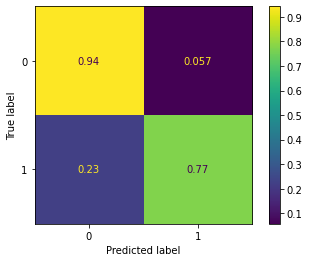

validation


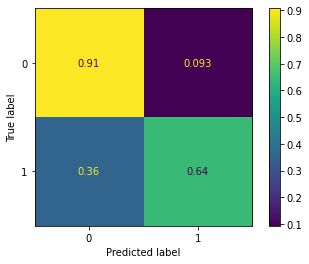

naive bayes
train


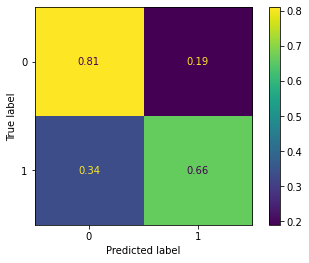

validation


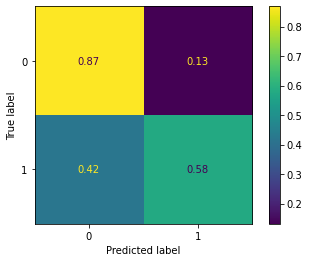

In [ ]:
cms = {}
for model, model_name in models.items():
  print(model_name)
  for set_name, sets in {"train": [X_train, t_train], "validation": [X_val, t_val]}.items():
    print(set_name)
    cms[model_name + ' ' + set_name] = create_cm(model, sets[0], sets[1])

From confuison matrix we can that the true negetive rate is quite good. That means that the prediction on pepole who didn't survive is good. We can also see that the knn model has better reults

## KPI



Lets calculate the KPIs

**precision** - The percentage of correct positive predictions out of all the positive predictions

**recall** - The percentage of correct positive predictions out of all the actual positive samples

**specificity** - The percentage of correct negative predictions out of all the actual negative samples

**fpr** - The percentage of mistaken negative predictions out of all the actual negative samples

**accuarcy** - The percentage of correct predictions out of all the data

Functions for calculate each kpi

In [ ]:
# calculate precision, recall, specificity, fpr and accuracy
def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

#print(f'Train: precision {precision(cm_train):.2f}, recall {recall(cm_train):.2f}, specificity {specificity(cm_train):.2f}, fpr {fpr(cm_train):.2f}, accuracy {accuracy(cm_train):.2f}')
#print(f'Val:   precision {precision(cm_val):.2f}, recall {recall(cm_val):.2f}, specificity {specificity(cm_val):.2f}, fpr {fpr(cm_val):.2f}, accuracy {accuracy(cm_val):.2f}')

Calculate the:

**F1 score** - The harmonic mean of precision and recall

**Balanced accuracy** - The arithmetic means of recall and specificity

In [ ]:
# calculate f1 and balanced accuracy
def f1(cm):
    precision_calc = precision(cm)
    recall_calc = recall(cm)
    return (2*precision_calc*recall_calc)/(precision_calc+recall_calc)

def balanced_accuracy(cm):
    recall_calc = recall(cm)
    specificity_calc = specificity(cm)
    return (recall_calc+specificity_calc)/2

#print(f'Train: f1 {f1(cm_train):.2f}, balanced_accuracy {balanced_accuracy(cm_train):.2f}')
#print(f'Val:   f1 {f1(cm_val):.2f}, balanced_accuracy {balanced_accuracy(cm_val):.2f}')

A function that creates a data frame - each row holds kpis scores of differnet set and model

In [ ]:
def create_kpis_df(cms):
    kpis_df = pd.DataFrame(columns=['precision', 'recall', 'specificity', 'fpr', 'accuarcy', 'f1', 'balanced_accuarcy'])
    for name, cm in cms.items():
        kpis_df.loc[len(kpis_df)] = [precision(cm), recall(cm), specificity(cm), fpr(cm), accuracy(cm), f1(cm), balanced_accuracy(cm)]
    return kpis_df


Create graphs from the data frame

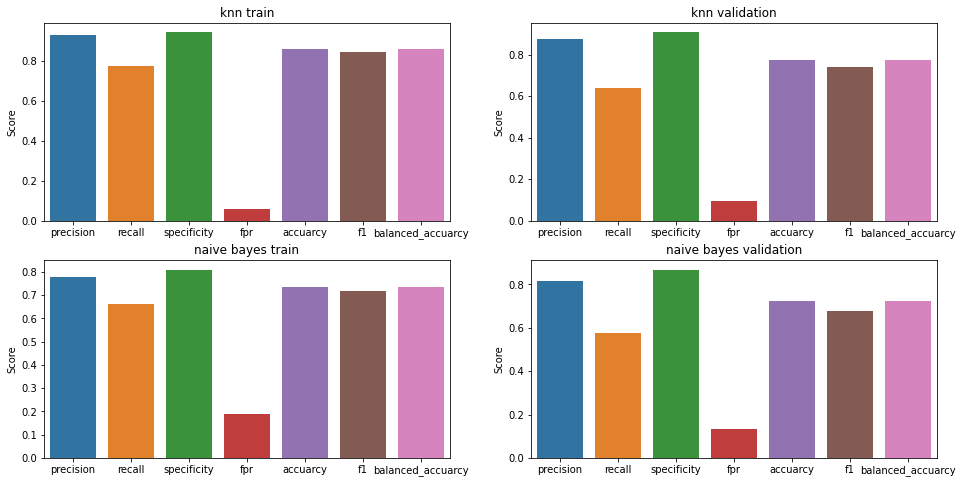

In [ ]:
def crete_kpi_graphs(data):
  num_rows = data.shape[0]
  num_cols = 2
  fig, ax = plt.subplots(num_rows//2, num_cols, figsize=(16,8))
  for i in range(num_rows):
      row_data = data.iloc[i,:]
      if num_rows > 2:
        sns.barplot(x=data.columns, y=row_data, ax=ax[i//2][i%2])
        ax[i//2][i%2].set_title(list(cms.keys())[i])
        ax[i//2][i%2].set_ylabel('Score')
      else:
        sns.barplot(x=data.columns, y=row_data, ax=ax[i])
        ax[i].set_title(list(cms.keys())[i])
        ax[i].set_ylabel('Score')
crete_kpi_graphs(create_kpis_df(cms))

We can see a few things from the graphs:
  1. The results are quite good
  2. The knn model is better from the naive baise model for this data
  3. The recall is a bit low in all the grpah - that means that the knn model does not predict very well cases with label 1 (Survived)
  4. The scores on the test data are better than the scores on validation data (make sense)

# Ensembles

We saw that the knn model has better results. 

I will use ensemble to get more accurate predictions and reduce the variance

I will use NFold Bagging

In [ ]:
# get score with nfold bagging
from sklearn.ensemble import BaggingClassifier

bag_fold_model = BaggingClassifier(base_estimator=knn,
                                   n_estimators=20, random_state=1,
                                   bootstrap=False).fit(X_train, t_train)

print('Accuracy score for classification:')
print('bag_fold_model', bag_fold_model.score(X_val, t_val).mean())

Accuracy score for classification:
bag_fold_model 0.7668393782383419


Lets see the confusion matrix and the kpi for this model

train


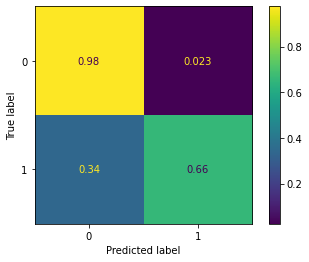

validation


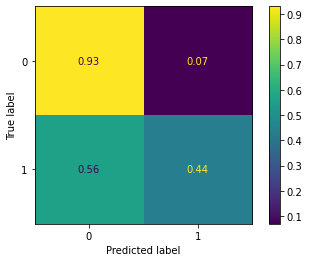

In [ ]:
cms = {}
for set_name, sets in {"train": [X_train, t_train], "validation": [X_val, t_val]}.items():
    print(set_name)
    cms['bag_fold_model' + ' ' + set_name] = create_cm(bag_fold_model, sets[0], sets[1])

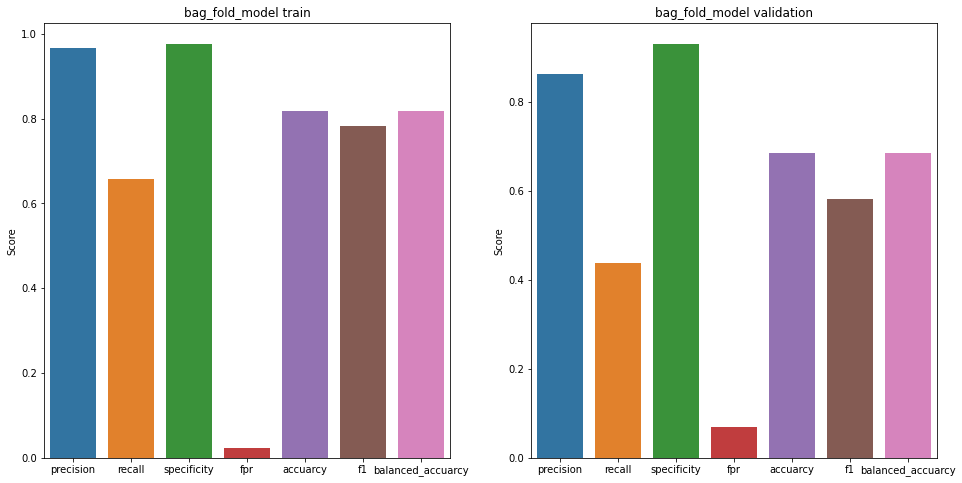

In [ ]:
crete_kpi_graphs(create_kpis_df(cms))

# Submit predictions on test data

In [ ]:
test_df = pd.read_csv('/content/31ca6b32c74efe784a91a5a6944fafaa/titanic_test')
test_df.info()
test_df = prepare_for_predict(test_df)
test_df
X_test = test_df.copy()
X_test = X_test.drop(columns = ['PassengerId'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
y_test = bag_fold_model.predict(X_test)
df = pd.DataFrame(y_test, columns=['Survived'])
df = pd.DataFrame(test_df['PassengerId']).join(df)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [ ]:
my_submission = df
my_submission.to_csv('submission.csv', index=False)